In [59]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from art.attacks.evasion import FastGradientMethod
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
tf.compat.v1.disable_eager_execution()

# Set the environment variable to limit TensorFlow logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppresses most logs

# Initialize TensorFlow and check it doesn't output other logs
tf.get_logger().setLevel('ERROR')

In [71]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Preprocessing - scale pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
cifar10_class_names = ["airplane", "automobile", "bird", "cat", "deer",
                       "dog", "frog", "horse", "ship", "truck"]

In [72]:
victim_model =  tf.keras.models.load_model('../models/simple-cifar10.h5',compile=False)

In [73]:
def predict(model,img):
    pred = model.predict(img)
    label = np.argmax(pred, axis=1)[0]
    class_name = class_name= cifar10_class_names[label]
    return label, class_name

def show_image(img, size = 1.2):
    if size>0:
        plt.figure(figsize=(size, size), dpi=80)
    plt.imshow(img)
    plt.axis('off')   


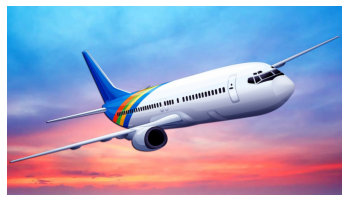

In [74]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# Load the image (without specifying target_size)
img = load_img('../images/airplane.jpg')
show_image(img,size=-1)

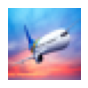

In [75]:
# Resize the image
img_resized = img.resize((32, 32))
show_image(img_resized)
# Convert the image back to a NumPy array for use with Keras
img_array = img_to_array(img_resized)
# Normalize the pixel values
img_data = np.array([img_array.astype('float32') / 255.0])


In [76]:
predict(victim_model,img_data)

(0, 'airplane')

In [77]:
from art.estimators.classification import KerasClassifier
# convert keras model to ART model
classifier = KerasClassifier(model=victim_model, clip_values=(0, 1), use_logits=False)
attack = FastGradientMethod(estimator=classifier, eps=0.01, targeted=True)
target = np.array([8])
adv_image = attack.generate(x=img_data, y=target)
predict(victim_model,adv_image)


(8, 'ship')

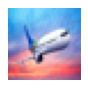

In [78]:
show_image(adv_image[0])


In [79]:
from PIL import Image
altered_image = Image.fromarray((adv_image[0] * 255).astype(np.uint8))
# Save the image
altered_image.save('altered_image.png')

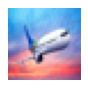

In [55]:
show_image(adv_image[0])

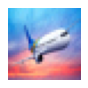

In [80]:
altered_img = load_img('altered_image.png')

show_image(altered_img)